# LETEC 2023

## Iremos usar dados de violência contra a mulher em Minas Gerais, de 2022. 

Os dados podem ser encontrados no [portal de dados abertos](https://dados.gov.br/dados/conjuntos-dados/violencia-contra-mulher) ou no [github do de transparencia-mg](https://github.com/transparencia-mg/violencia-contra-mulher/tree/main). 

Após procurar no Github, pudemos encontrar uma breve [descrição das colunas](https://github.com/transparencia-mg/violencia-contra-mulher/blob/main/schemas/violencia_domestica_v1.yaml).


  - municipio_cod: Código do Município do Evento
  - municipio_fato: Nome do Município do Evento
  - data_fato: data de ocorrência do evento
  - mes: mês de ocorrência do evento
  - ano: ano de ocorrência do evento
  - risp: Região Integrada de Segurança Pública
  - rmbh: Região Metropolitana de BH
  - natureza_delito: Natureza do Delito
  - tentado_consumado: Tentado ou consumado
  - name: qtde_vitimas: quantitativo de vítimas de violência doméstica


## Importando e lendo os dados

In [639]:
import pandas as pd

In [640]:
df = pd.read_csv('../dados/violencia_domestica_2022.csv', sep=';')

In [641]:
df.head()

,municipio_cod,municipio_fato,data_fato,mes,ano,risp,rmbh,natureza_delito,tentado_consumado,qtde_vitimas
0,310010,ABADIA DOS DOURADOS,2022-01-01,1,2022,10º Departamento - Patos de Minas,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1
1,310020,ABAETE,2022-01-01,1,2022,7º Departamento - Divinópolis,3) Interior de MG,AMEACA,CONSUMADO,1
2,310030,ABRE-CAMPO,2022-01-01,1,2022,12º Departamento - Ipatinga,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1
3,310030,ABRE-CAMPO,2022-01-01,1,2022,12º Departamento - Ipatinga,3) Interior de MG,VIAS DE FATO / AGRESSAO,CONSUMADO,1
4,310090,AGUAS FORMOSAS,2022-01-01,1,2022,15º Departamento - Teófilo Otoni,3) Interior de MG,AMEACA,CONSUMADO,1


## Analisando os dados

### Conferindo total de dados nas colunas e o tipos de dados

Vendo qual o tipo de dado da coluna de data_fato e mudando para o tipo datetime, que é a coluna que o pandas entende como data.

In [598]:
df['data_fato'].dtypes

dtype('O')

In [599]:
df['data_fato'] = df['data_fato'].apply(pd.to_datetime)

In [600]:
df['data_fato'].dtypes

dtype('<M8[ns]')

Vendo a quantidade de municipios diferentes que temos nestes dados

In [133]:
len(df['municipio_cod'].unique())

852

Conferindo se a quantidade de municipios diferentes da coluna municipio_fato 
é o mesmo da coluna municipio_cod

In [134]:
len(df['municipio_fato'].unique())

852

Conferindo se temos dados apenas de 2022

In [135]:
df['ano'].unique()

array([2022])

Vendo quantas risp e rmbh temos e quais são caso o número seja pequeno.

In [136]:
len(df['risp'].unique())

19

In [137]:
df['risp'].value_counts()

12º Departamento - Ipatinga               9623
4º Departamento - Juiz de Fora            7917
2º Departamento - Contagem                7881
7º Departamento - Divinópolis             6770
11º Departamento - Montes Claros          6637
18º Departamento - Poços de Caldas        6282
3º Departamento - Vespasiano              5880
6º Departamento - Lavras                  5564
5º Departamento - Uberaba                 5332
17º Departamento - Pouso Alegre           5218
13º Departamento - Barbacena              5006
15º Departamento - Teófilo Otoni          4563
14º Departamento - Curvelo                4504
1º Departamento - Belo Horizonte          4370
8º Departamento - Governador Valadares    4176
9º Departamento - Uberlândia              3871
10º Departamento - Patos de Minas         3360
19º Departamento - Sete Lagoas            2728
16º Departamento - Unaí                   2190
Name: risp, dtype: int64

In [138]:
df['risp'].value_counts(normalize=True)

12º Departamento - Ipatinga               0.094462
4º Departamento - Juiz de Fora            0.077715
2º Departamento - Contagem                0.077362
7º Departamento - Divinópolis             0.066456
11º Departamento - Montes Claros          0.065150
18º Departamento - Poços de Caldas        0.061666
3º Departamento - Vespasiano              0.057719
6º Departamento - Lavras                  0.054618
5º Departamento - Uberaba                 0.052340
17º Departamento - Pouso Alegre           0.051221
13º Departamento - Barbacena              0.049140
15º Departamento - Teófilo Otoni          0.044792
14º Departamento - Curvelo                0.044212
1º Departamento - Belo Horizonte          0.042897
8º Departamento - Governador Valadares    0.040993
9º Departamento - Uberlândia              0.037999
10º Departamento - Patos de Minas         0.032983
19º Departamento - Sete Lagoas            0.026779
16º Departamento - Unaí                   0.021498
Name: risp, dtype: float64

In [139]:
len(df['rmbh'].unique())

3

In [140]:
df['rmbh'].value_counts()

3) Interior de MG    84348
2) RMBH (sem BH)     13154
1) Belo Horizonte     4370
Name: rmbh, dtype: int64

In [239]:
df['rmbh'].value_counts(normalize=True)

3) Interior de MG    0.827980
2) RMBH (sem BH)     0.129123
1) Belo Horizonte    0.042897
Name: rmbh, dtype: float64

In [141]:
df['rmbh'].value_counts(normalize=True)

3) Interior de MG    0.827980
2) RMBH (sem BH)     0.129123
1) Belo Horizonte    0.042897
Name: rmbh, dtype: float64

Inspecionando quantos tipos de delito e tipos de casos temos.

In [142]:
len(df['natureza_delito'].unique())

188

In [143]:
df['natureza_delito'].value_counts()

AMEACA                                                28997
VIAS DE FATO / AGRESSAO                               20155
LESAO CORPORAL                                        16874
DESCUMPRIMENTO DE MEDIDA PROTETIVA DE URGENCIA         5570
ATEND. DENUNCIA INFRACOES CONTRA MULHER(VIOLENCIA      3444
                                                      ...  
FRUSTRA DIREITO ASSEGURADO NA LEI TRABALHISTA             1
ATENDIMENTO DE DENUNCIA DE INFRACOES ENVOLVENDO AR        1
CONCORRENCIA DESLEAL                                      1
CRUELDADE CONTRA ANIMAIS                                  1
FRAUDE PROCESSUAL                                         1
Name: natureza_delito, Length: 188, dtype: int64

In [144]:
for col in df:
    print(df['natureza_delito'].unique())

['LESAO CORPORAL' 'AMEACA' 'VIAS DE FATO / AGRESSAO'
 'ATEND. DENUNCIA INFRACOES CONTRA MULHER(VIOLENCIA ' 'INJURIA' 'DANO'
 'PERTURBACAO DA TRANQUILIDADE'
 'DESCUMPRIMENTO DE MEDIDA PROTETIVA DE URGENCIA'
 'DESOBEDECE ORDEM JUDICIAL (PERDA/SUS DIREITO)'
 'EMBRIAGUEZ (ESCANDALO/PERIGO)' 'ESTUPRO DE VULNERAVEL' 'INCENDIO'
 'OUTROS INFRACOES C/ A PESSOA' 'VIOLACAO DE DOMICILIO'
 'APROPRIACAO INDEBITA DE COISA ALHEIA MOVEL' 'DIFAMACAO' 'ATRITO VERBAL'
 'FURTO' 'PORTE ILEGAL ARMA DE FOGO/ACESSÓRIO/MUNIÇÃO DE USO'
 'PERSEGUICAO' 'OUTRAS ACOES DEFESA SOCIAL' 'HOMICIDIO' 'ESTELIONATO'
 'ESTUPRO' 'PERTURBACAO DO TRABALHO OU DO SOSSEGO ALHEIOS'
 'EXPOE A PERIGO/ PRIVA DE COMIDA/CUIDADO IDOSO'
 'DISPARO DE ARMA DE FOGO/ACIONAM DE MUNICAO' 'MAUS TRATOS'
 'SEQUESTRO E CARCERE PRIVADO'
 'OUTRAS INFRACOES CONTRA DIGNIDADE SEXUAL E A FAMIL'
 'OUTRAS INFRACOES DEMAIS LEIS ESPECIAIS '
 'DIVULGACAO CENA ESTUPRO E IMAGEM NUDEZ, SEXO OU PO' 'CALUNIA'
 'POSSE ILEGAL ARMA DE FOGO/ACESSÓRIO/MUNIÇÃO DE USO'
 

In [145]:
df['natureza_delito'].value_counts().head(15)

AMEACA                                                28997
VIAS DE FATO / AGRESSAO                               20155
LESAO CORPORAL                                        16874
DESCUMPRIMENTO DE MEDIDA PROTETIVA DE URGENCIA         5570
ATEND. DENUNCIA INFRACOES CONTRA MULHER(VIOLENCIA      3444
DANO                                                   3076
ATRITO VERBAL                                          2108
PERSEGUICAO                                            2054
FURTO                                                  1893
INJURIA                                                1822
OUTRAS ACOES DEFESA SOCIAL                             1579
OUTROS INFRACOES C/ A PESSOA                           1538
VIOLENCIA PSICOLOGICA                                  1401
DIFAMACAO                                              1083
ESTUPRO DE VULNERAVEL                                  1078
Name: natureza_delito, dtype: int64

In [146]:
df['natureza_delito'].value_counts(normalize=True).head(15)

AMEACA                                                0.284642
VIAS DE FATO / AGRESSAO                               0.197846
LESAO CORPORAL                                        0.165639
DESCUMPRIMENTO DE MEDIDA PROTETIVA DE URGENCIA        0.054676
ATEND. DENUNCIA INFRACOES CONTRA MULHER(VIOLENCIA     0.033807
DANO                                                  0.030195
ATRITO VERBAL                                         0.020693
PERSEGUICAO                                           0.020163
FURTO                                                 0.018582
INJURIA                                               0.017885
OUTRAS ACOES DEFESA SOCIAL                            0.015500
OUTROS INFRACOES C/ A PESSOA                          0.015097
VIOLENCIA PSICOLOGICA                                 0.013753
DIFAMACAO                                             0.010631
ESTUPRO DE VULNERAVEL                                 0.010582
Name: natureza_delito, dtype: float64

In [147]:
len(df['tentado_consumado'].unique())

2

In [148]:
df['tentado_consumado'].value_counts()

CONSUMADO    100948
TENTADO         924
Name: tentado_consumado, dtype: int64

In [149]:
df['tentado_consumado'].value_counts(normalize=True)

CONSUMADO    0.99093
TENTADO      0.00907
Name: tentado_consumado, dtype: float64

Fazendo a mesma inspeção para a quantidade de vítimas

In [150]:
len(df['qtde_vitimas'].unique())

29

In [151]:
df['qtde_vitimas'].unique()

array([ 1,  2,  3,  5, 13,  4,  7, 20,  9,  6, 11, 18, 14, 15, 12, 16,  8,
       10, 17, 26, 19, 30, 23, 24, 21, 22, 27, 29, 25])

In [152]:
df['qtde_vitimas'].value_counts()

1     83024
2     11853
3      3463
4      1476
5       691
6       372
7       213
8       118
9       101
10       85
12       65
15       64
13       61
11       60
14       53
16       39
17       34
18       30
20       23
19       18
21        8
22        6
23        4
24        4
26        2
27        2
30        1
29        1
25        1
Name: qtde_vitimas, dtype: int64

In [153]:
df['qtde_vitimas'].value_counts(normalize=True)

1     0.814984
2     0.116352
3     0.033994
4     0.014489
5     0.006783
6     0.003652
7     0.002091
8     0.001158
9     0.000991
10    0.000834
12    0.000638
15    0.000628
13    0.000599
11    0.000589
14    0.000520
16    0.000383
17    0.000334
18    0.000294
20    0.000226
19    0.000177
21    0.000079
22    0.000059
23    0.000039
24    0.000039
26    0.000020
27    0.000020
30    0.000010
29    0.000010
25    0.000010
Name: qtde_vitimas, dtype: float64

In [542]:
# inspecionando valores bem altos de vítimas
values = [30, 29, 27, 26, 25, 24, 23, 22, 21, 20, 19]

for v in values:
    print(v)
    print(df[['natureza_delito', 'tentado_consumado', 'rmbh', 'data_fato']].loc[df['qtde_vitimas'] == v])
    print('-'*90)

30
               natureza_delito tentado_consumado               rmbh  data_fato
15418  VIAS DE FATO / AGRESSAO         CONSUMADO  1) Belo Horizonte 2022-02-26
------------------------------------------------------------------------------------------
29
               natureza_delito tentado_consumado               rmbh  data_fato
93733  VIAS DE FATO / AGRESSAO         CONSUMADO  1) Belo Horizonte 2022-12-03
------------------------------------------------------------------------------------------
27
      natureza_delito tentado_consumado               rmbh  data_fato
58017          AMEACA         CONSUMADO  1) Belo Horizonte 2022-07-31
72006          AMEACA         CONSUMADO  1) Belo Horizonte 2022-09-18
------------------------------------------------------------------------------------------
26
               natureza_delito tentado_consumado               rmbh  data_fato
7943   VIAS DE FATO / AGRESSAO         CONSUMADO  1) Belo Horizonte 2022-01-30
50548  VIAS DE FATO / AGRESSAO 

### Fazendo gráficos (plotando) finais de informações de contagem

In [306]:
import seaborn as sns

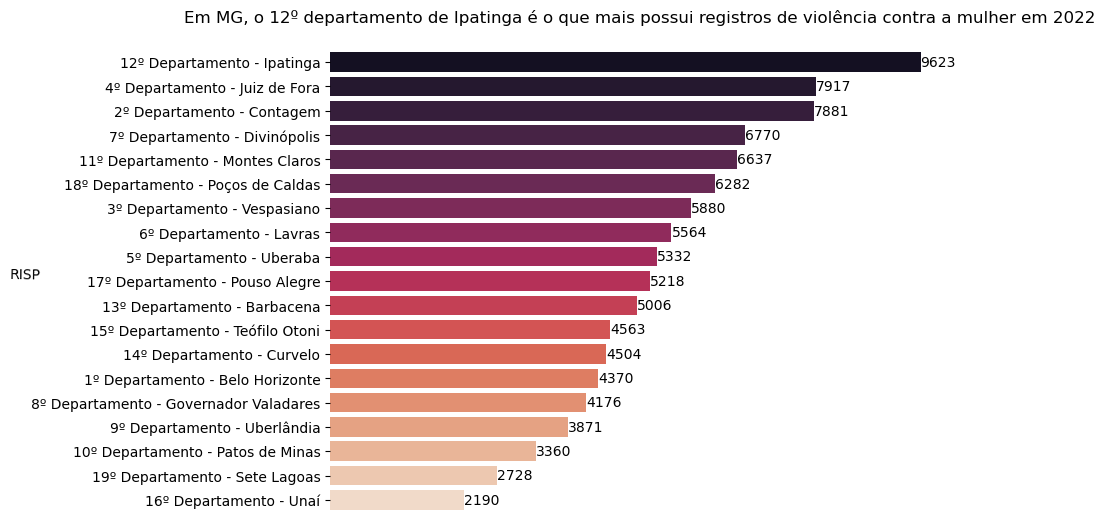

In [579]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(y='risp', data=df, order = df['risp'].value_counts().index, palette='rocket')
sns.despine(bottom = True, left = True)
ax.set_title('Em MG, o 12º departamento de Ipatinga é o que mais possui registros de violência contra a mulher em 2022', pad=20)
#ax.figure.subplots_adjust(top=.85, bottom=.12)
#ax.set_title('', fontsize=9)
ax.set(xticks=[])
ax.set(xlabel=None)
ax.set_ylabel(ylabel='RISP', rotation=-1)
ax.bar_label(ax.containers[0]);

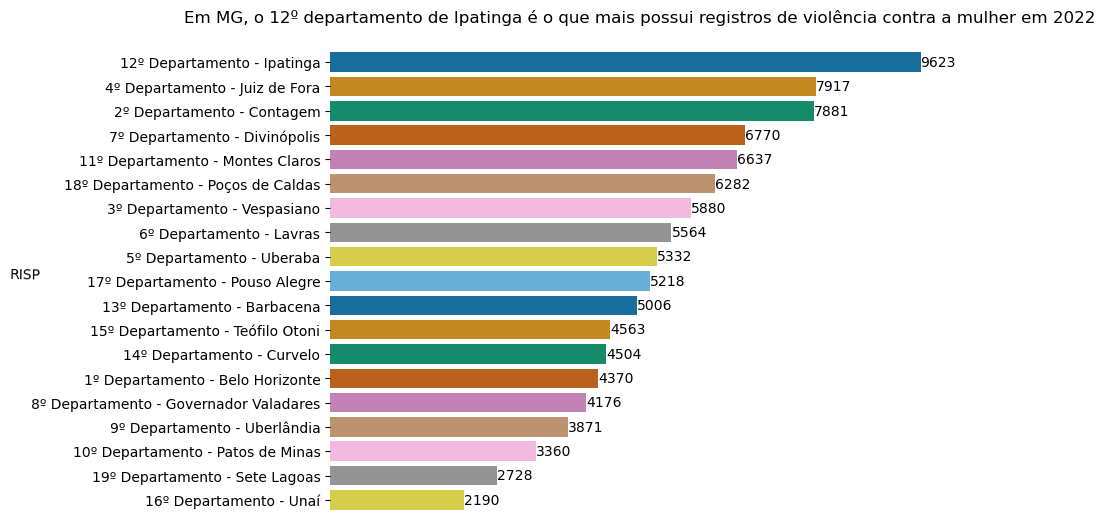

In [578]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(y='risp', data=df, order = df['risp'].value_counts().index, palette='colorblind')
sns.despine(bottom = True, left = True)
ax.set_title('Em MG, o 12º departamento de Ipatinga é o que mais possui registros de violência contra a mulher em 2022', pad=20)
#ax.figure.subplots_adjust(top=.85, bottom=.12)
#ax.set_title('', fontsize=9)
ax.set(xticks=[])
ax.set(xlabel=None)
ax.set_ylabel(ylabel='RISP', rotation=-1)
ax.bar_label(ax.containers[0]);

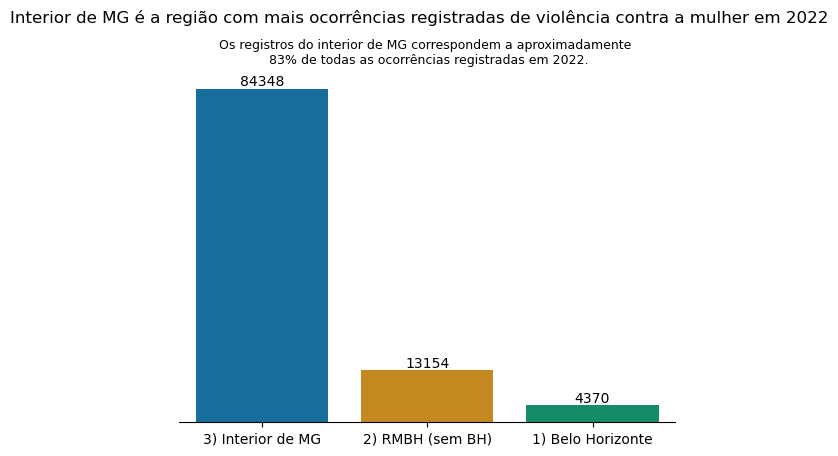

In [445]:
ax = sns.countplot(x='rmbh', data=df, order=df['rmbh'].value_counts().index, palette='colorblind')
sns.despine(bottom = False, left = True)
ax.figure.suptitle('Interior de MG é a região com mais ocorrências registradas de violência contra a mulher em 2022')
ax.figure.subplots_adjust(top=.85, bottom=.12)
ax.set_title('Os registros do interior de MG correspondem a aproximadamente \n 83% de todas as ocorrências registradas em 2022.', fontsize=9)
ax.set(yticks=[])
ax.set(ylabel=None)
ax.set(xlabel=None)
#ax.set(xlabel='RMBH')
ax.bar_label(ax.containers[0]);

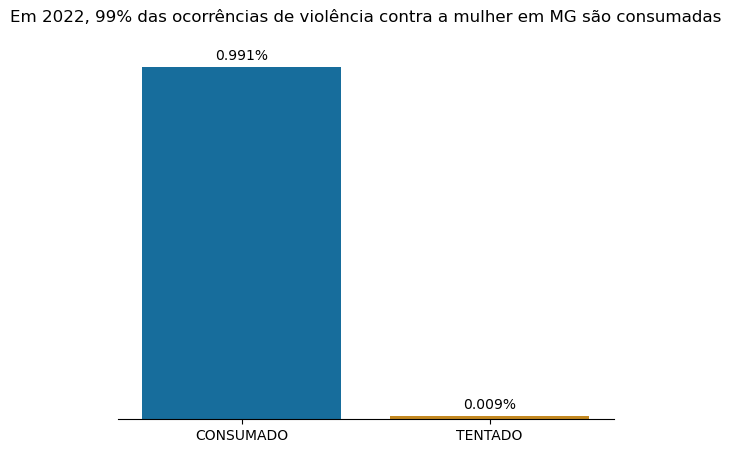

In [577]:
#ax = sns.histplot(x='tentado_consumado', data=df, stat='percent', legend=False)
ax = sns.barplot(x=df['tentado_consumado'].value_counts().index, y=df['tentado_consumado'].value_counts(normalize=True).values, palette='colorblind')
sns.despine(bottom = False, left = True)
ax.set_title('Em 2022, 99% das ocorrências de violência contra a mulher em MG são consumadas', pad=20)
ax.set(yticks=[])
ax.set(ylabel=None)
ax.set(xlabel=None)
ax.bar_label(ax.containers[0], fmt='%.3f%%', padding=3);

In [510]:
len(df['natureza_delito'].unique())

188

In [514]:
df.shape

(101872, 13)

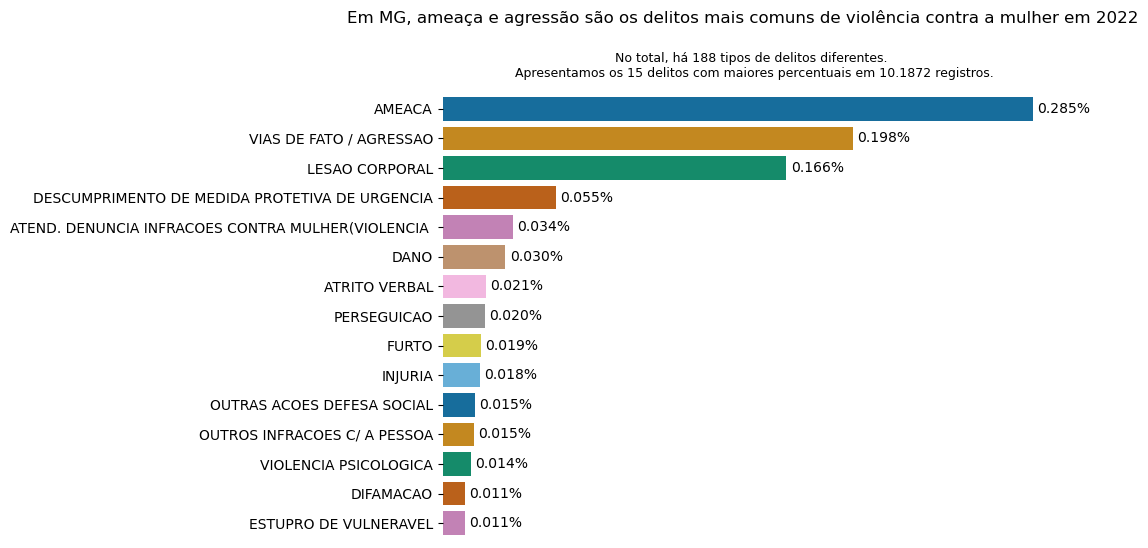

In [573]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(y=df['natureza_delito'].value_counts(normalize=True).head(15).index, x=df['natureza_delito'].value_counts(normalize=True).head(15).values, palette='colorblind')
sns.despine(bottom = True, left = True)
ax.figure.suptitle('Em MG, ameaça e agressão são os delitos mais comuns de violência contra a mulher em 2022')
ax.figure.subplots_adjust(top=.84, bottom=.10)
ax.set_title('No total, há 188 tipos de delitos diferentes. \n Apresentamos os 15 delitos com maiores percentuais em 10.1872 registros.', fontsize=9, pad=12)
ax.set(xticks=[])
ax.set(xlabel=None)
ax.bar_label(ax.containers[0], fmt='%.3f%%', padding=3);

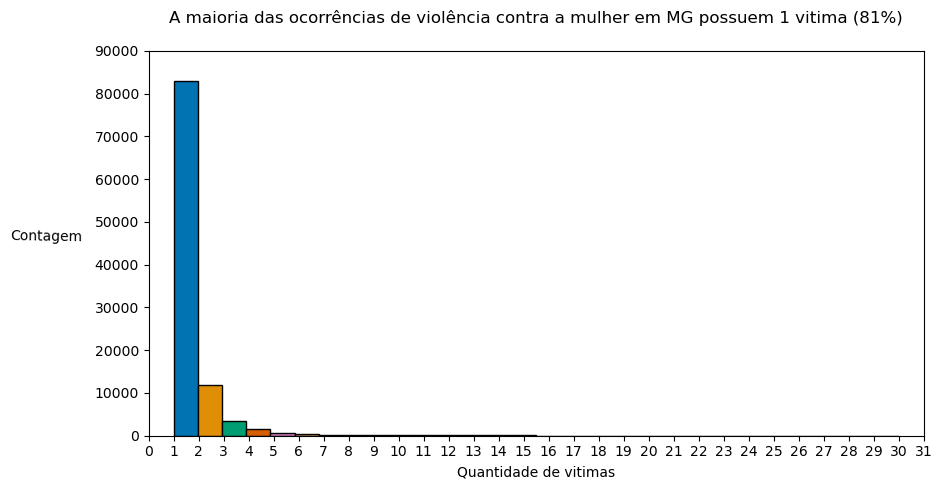

In [566]:
plt.figure(figsize=(10,5))
cm = sns.color_palette("colorblind", 30)
ax = sns.histplot(data=df, x='qtde_vitimas', bins=30)

for bin_,i in zip(ax.patches, cm):
    bin_.set_facecolor(i)

ax.set(xlim=(0,31),ylim=(0,90000))
#ax.set_xlim(0,31)
ax.set_xticks(range(0,32))
ax.set(xlabel='Quantidade de vitimas')
ax.set_ylabel(ylabel='Contagem', rotation=-1, labelpad=35)
ax.set_title('A maioria das ocorrências de violência contra a mulher em MG possuem 1 vitima (81%)', pad=20);

### Entendendo medidas descritivas dos dados e escolhendo colunas

In [642]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
municipio_cod,101872.0,313692.296107,2127.476060,310010.0,311860.0,313670.0,315430.0,317220.0
mes,101872.0,6.544438,3.457818,1.0,4.0,7.0,10.0,12.0
ano,101872.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0
qtde_vitimas,101872.0,1.374872,1.295465,1.0,1.0,1.0,1.0,30.0


In [602]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101872 entries, 0 to 101871
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   municipio_cod      101872 non-null  int64         
 1   municipio_fato     101872 non-null  object        
 2   data_fato          101872 non-null  datetime64[ns]
 3   mes                101872 non-null  int64         
 4   ano                101872 non-null  int64         
 5   risp               101872 non-null  object        
 6   rmbh               101872 non-null  object        
 7   natureza_delito    101872 non-null  object        
 8   tentado_consumado  101872 non-null  object        
 9   qtde_vitimas       101872 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 7.8+ MB


In [643]:
df.columns

Index(['municipio_cod', 'municipio_fato', 'data_fato', 'mes', 'ano', 'risp',
       'rmbh', 'natureza_delito', 'tentado_consumado', 'qtde_vitimas'],
      dtype='object')

In [644]:
colunas_selecionadas = ['risp', 'rmbh', 'natureza_delito', 'tentado_consumado', 'qtde_vitimas']

In [645]:
df = df[colunas_selecionadas]

In [646]:
df.head()

,risp,rmbh,natureza_delito,tentado_consumado,qtde_vitimas
0,10º Departamento - Patos de Minas,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1
1,7º Departamento - Divinópolis,3) Interior de MG,AMEACA,CONSUMADO,1
2,12º Departamento - Ipatinga,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1
3,12º Departamento - Ipatinga,3) Interior de MG,VIAS DE FATO / AGRESSAO,CONSUMADO,1
4,15º Departamento - Teófilo Otoni,3) Interior de MG,AMEACA,CONSUMADO,1


### Plotando gráficos de análise interna de cada coluna

In [630]:
import seaborn as sns
import matplotlib.pyplot as plt

In [631]:
for coluna in df.columns:
  print(coluna)

risp
rmbh
natureza_delito
tentado_consumado
qtde_vitimas


### Histrogramas das colunas

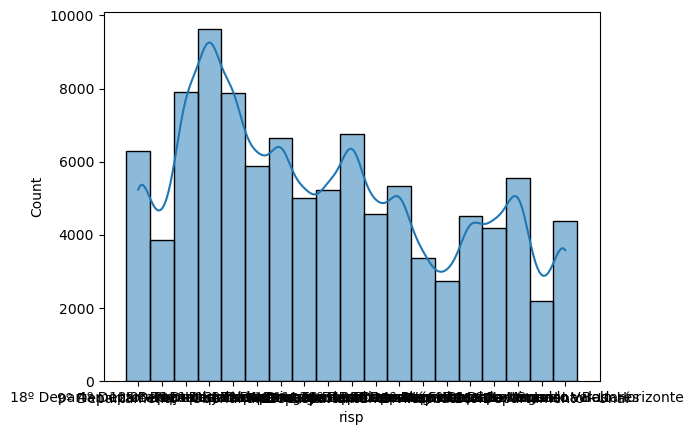

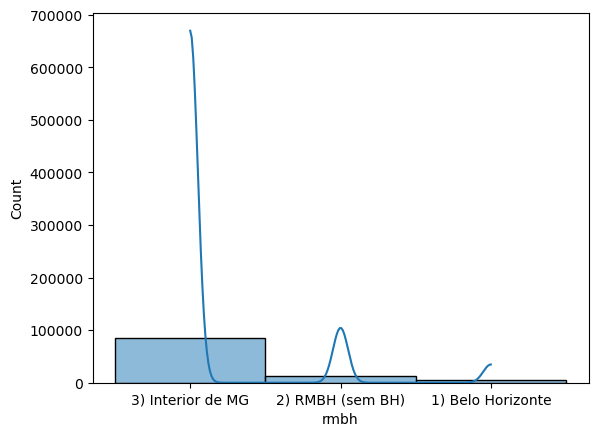

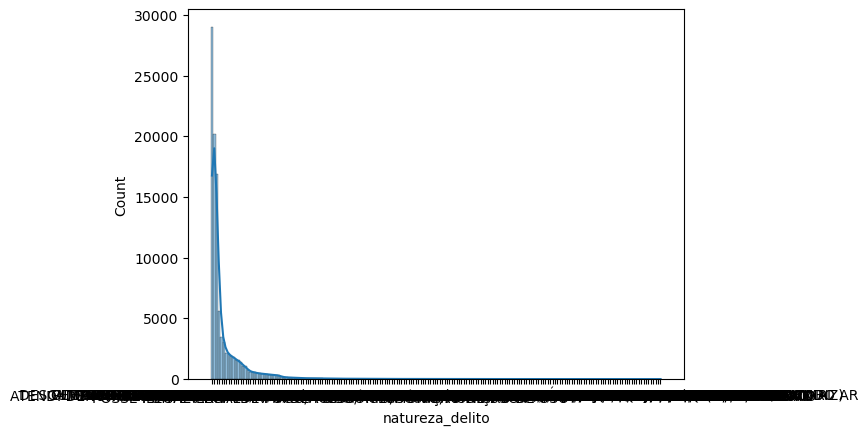

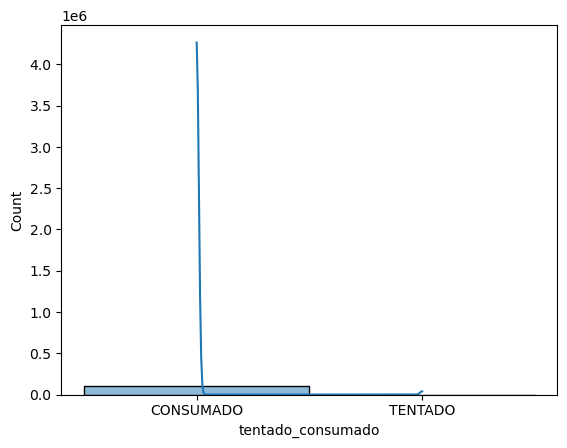

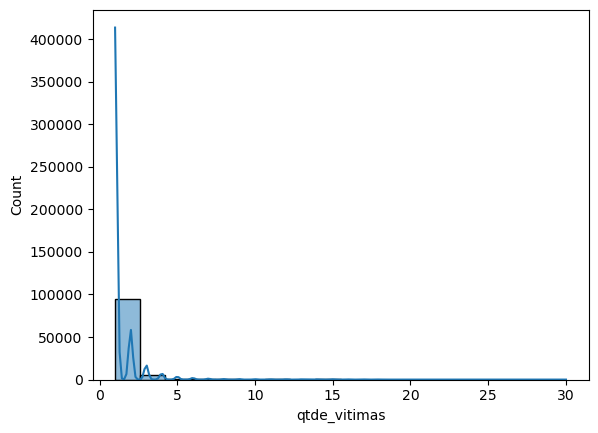

In [632]:
for coluna in df.columns:
    sns.histplot(data=df, x=coluna, kde=True) # kde plota a curva da distribuição
    plt.show()

### Boxplots (diagramas de caixa) das colunas

Reduzindo os dados as 15 ocorrencias mais comuns

In [647]:
# gerando frequencias dos delitos
df['freq_delito'] = df.groupby('natureza_delito')['natureza_delito'].transform('count')/101872
# ordenando os dados pelas frequencias
df = df.sort_values(by='freq_delito', ascending=False)

In [648]:
# filtrando os dados pelas frequencias dos 15 delitos mais comuns
df15 = df[df['freq_delito'] >= 0.010582]

In [649]:
df15

,risp,rmbh,natureza_delito,tentado_consumado,qtde_vitimas,freq_delito
71802,18º Departamento - Poços de Caldas,3) Interior de MG,AMEACA,CONSUMADO,1,0.284642
20652,9º Departamento - Uberlândia,3) Interior de MG,AMEACA,CONSUMADO,2,0.284642
71540,4º Departamento - Juiz de Fora,3) Interior de MG,AMEACA,CONSUMADO,1,0.284642
20664,4º Departamento - Juiz de Fora,3) Interior de MG,AMEACA,CONSUMADO,1,0.284642
20663,12º Departamento - Ipatinga,3) Interior de MG,AMEACA,CONSUMADO,1,0.284642
...,...,...,...,...,...,...
35168,8º Departamento - Governador Valadares,3) Interior de MG,DIFAMACAO,CONSUMADO,1,0.010631
38754,2º Departamento - Contagem,2) RMBH (sem BH),DIFAMACAO,CONSUMADO,1,0.010631
8369,12º Departamento - Ipatinga,3) Interior de MG,DIFAMACAO,CONSUMADO,1,0.010631
2192,5º Departamento - Uberaba,3) Interior de MG,DIFAMACAO,CONSUMADO,1,0.010631


In [650]:
df15.shape

(91594, 6)

In [655]:
#df15.drop('risp', axis=1, inplace=True)

In [659]:
df = df15

### Transformando categorias em numeros

In [660]:
df['tentado_consumado_code'] = df['tentado_consumado'].astype('category').cat.codes
df['natureza_delito_code'] = df['natureza_delito'].astype('category').cat.codes
df['rmbh_code'] = df['rmbh'].astype('category').cat.codes

/var/folders/jg/2dgmn_k55gl3cs8syw0tw_yw0000gn/T/ipykernel_20274/4850745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tentado_consumado_code'] = df['tentado_consumado'].astype('category').cat.codes
/var/folders/jg/2dgmn_k55gl3cs8syw0tw_yw0000gn/T/ipykernel_20274/4850745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['natureza_delito_code'] = df['natureza_delito'].astype('category').cat.codes
/var/folders/jg/2dgmn_k55gl3cs8syw0tw_yw0000gn/T/ipykernel_20274/4850745.py:3: SettingWithCopyWarn

In [661]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91594 entries, 71802 to 57090
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rmbh                    91594 non-null  object 
 1   natureza_delito         91594 non-null  object 
 2   tentado_consumado       91594 non-null  object 
 3   qtde_vitimas            91594 non-null  int64  
 4   freq_delito             91594 non-null  float64
 5   tentado_consumado_code  91594 non-null  int8   
 6   natureza_delito_code    91594 non-null  int8   
 7   rmbh_code               91594 non-null  int8   
dtypes: float64(1), int64(1), int8(3), object(3)
memory usage: 4.5+ MB


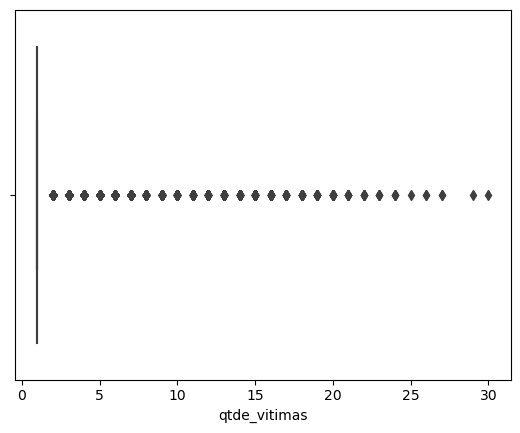

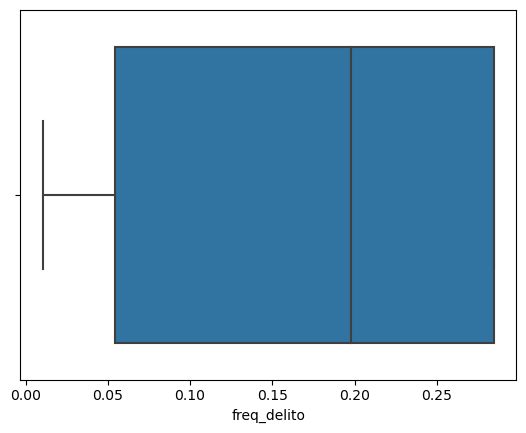

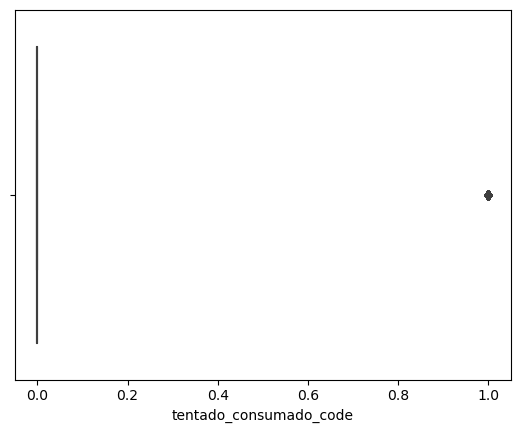

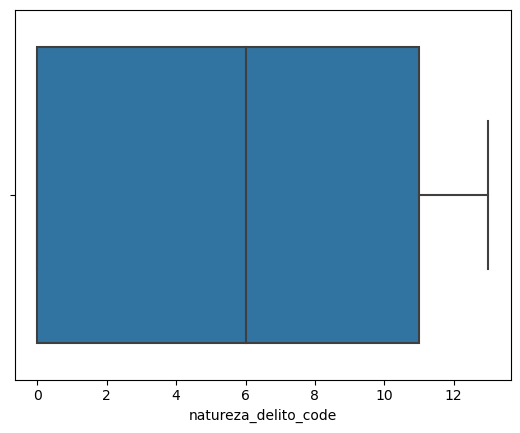

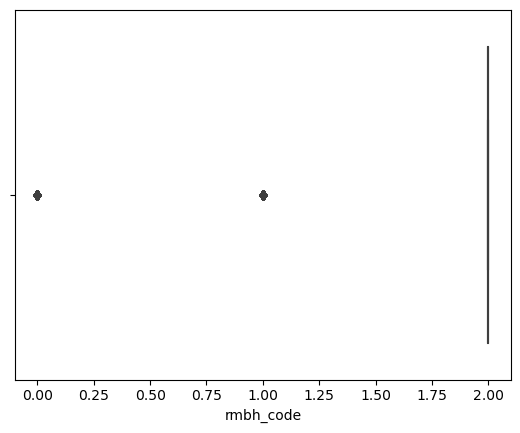

In [662]:
for coluna in df.columns:
    if (df[coluna].dtype != 'datetime64[ns]' and df[coluna].dtype != 'object'):
        sns.boxplot(data=df, x=coluna)
        plt.show()

In [663]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
qtde_vitimas,91594.0,1.407854,1.357688,1.000000,1.000000,1.000000,1.000000,30.000000
freq_delito,91594.0,0.172298,0.099655,0.010631,0.054676,0.197846,0.284642,0.284642
tentado_consumado_code,91594.0,0.006409,0.079798,0.000000,0.000000,0.000000,0.000000,1.000000
natureza_delito_code,91594.0,5.632956,4.851853,0.000000,0.000000,6.000000,11.000000,13.000000
rmbh_code,91594.0,1.800238,0.481010,0.000000,2.000000,2.000000,2.000000,2.000000


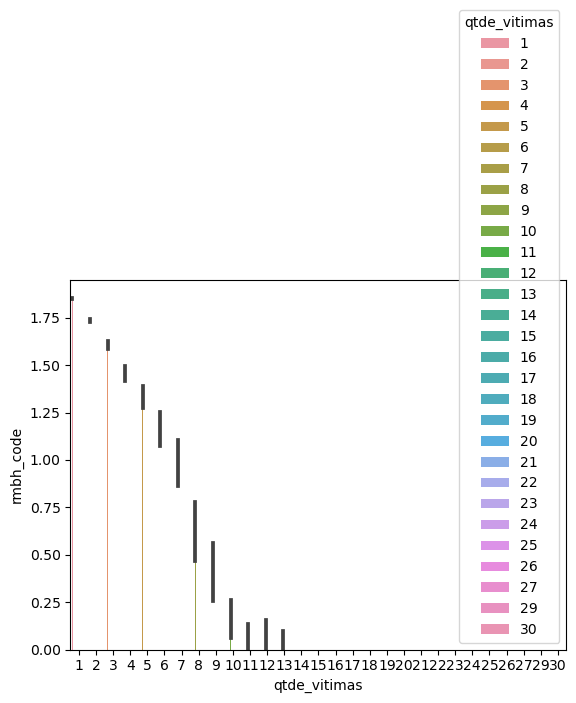

In [664]:
sns.barplot(data=df, x='qtde_vitimas', y='rmbh_code', hue='qtde_vitimas');

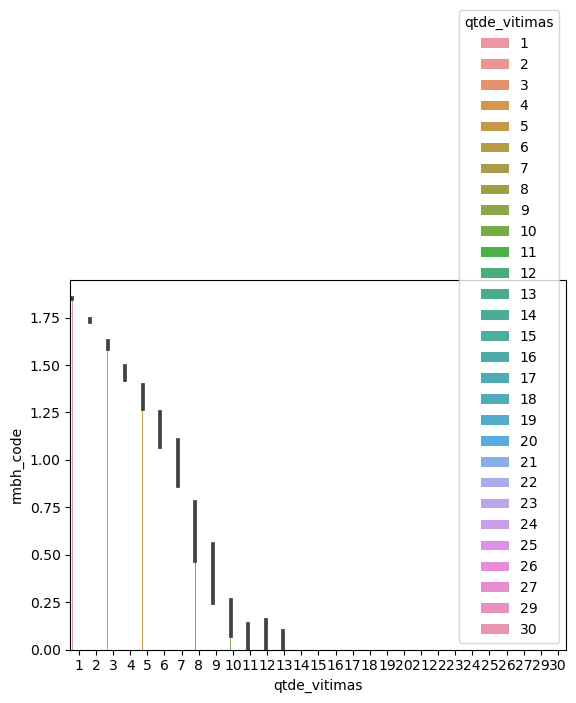

In [665]:
sns.barplot(data=dfs, x='qtde_vitimas', y='rmbh_code', hue='qtde_vitimas');

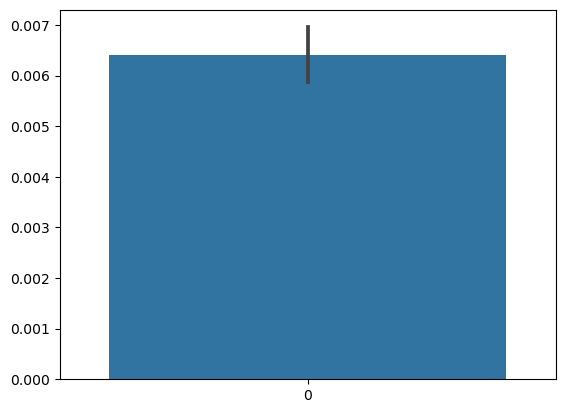

In [666]:
sns.barplot(data=df['tentado_consumado_code']);

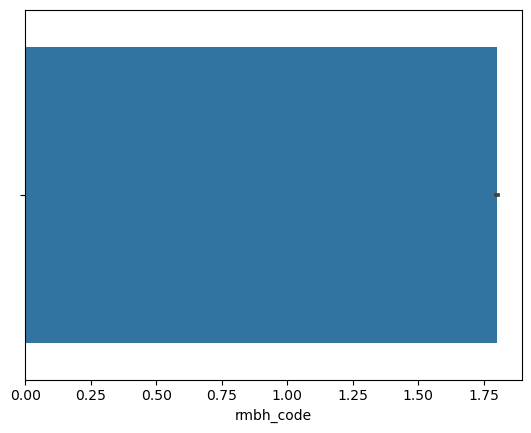

In [667]:
sns.barplot(data=df, x=df['rmbh_code']);

### Plotando distribuições das combinacoes de colunas de acordo com o resultado (pairplot)

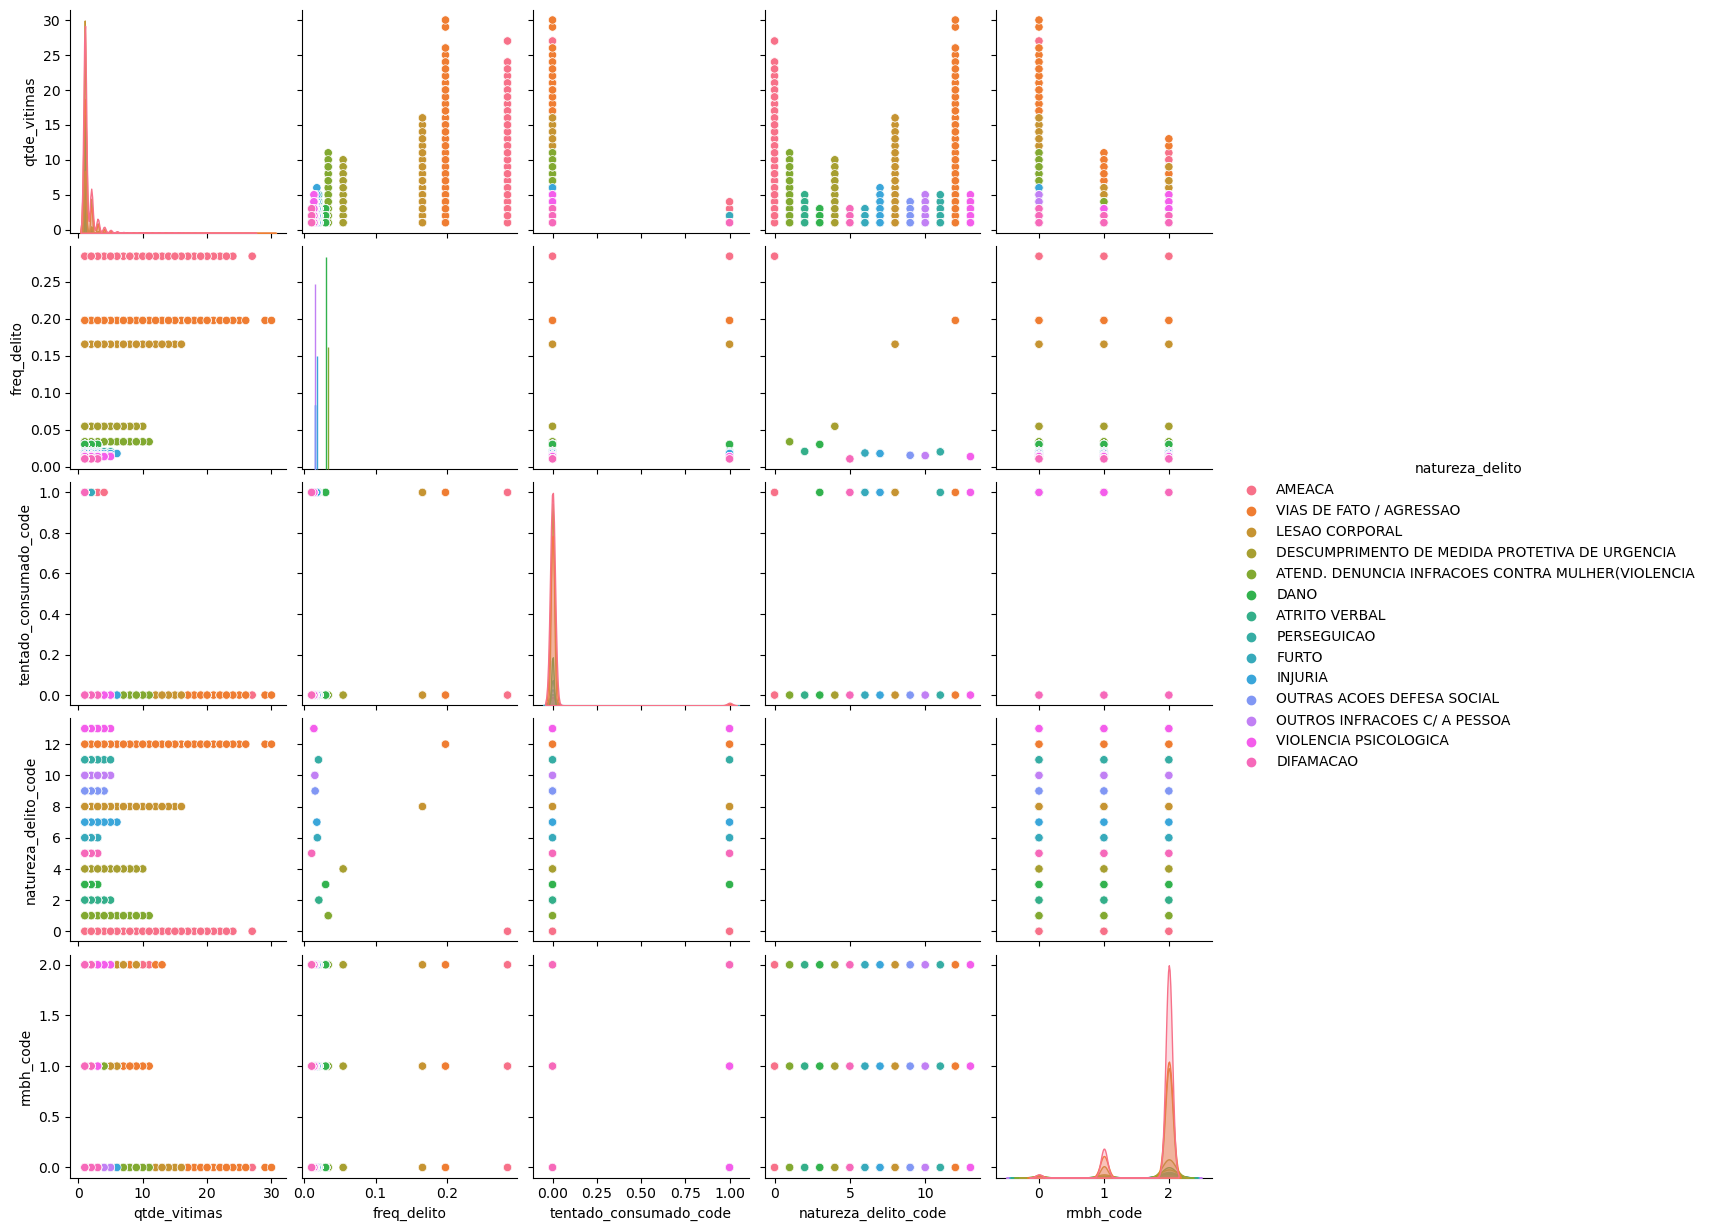

In [50]:
sns.pairplot(df, hue='natureza_delito');

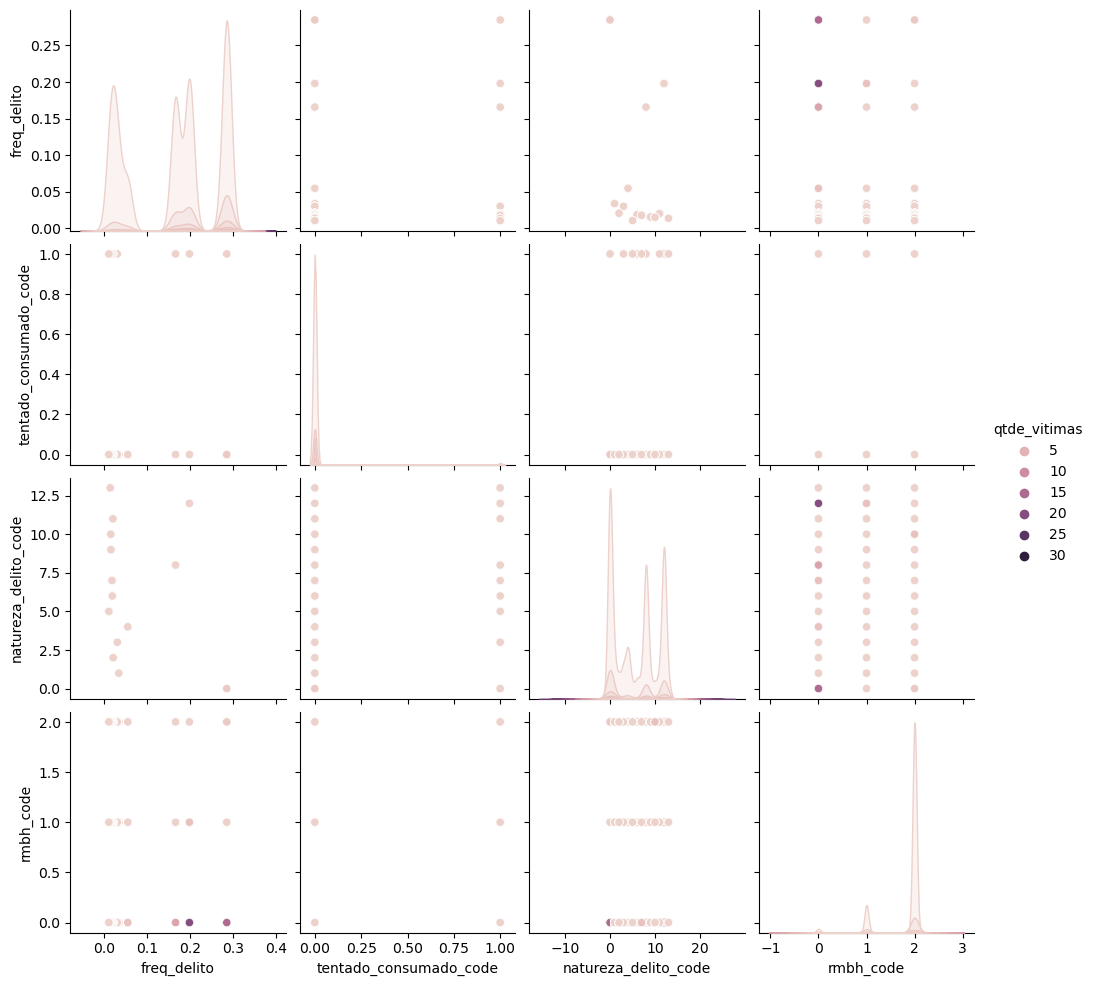

In [51]:
sns.pairplot(df, hue='qtde_vitimas');

## Dividindo os dados entre o que vamos usar para alimentar o modelo (X) e o que vamos tentar adivinhar (y)

In [668]:
df

,rmbh,natureza_delito,tentado_consumado,qtde_vitimas,freq_delito,tentado_consumado_code,natureza_delito_code,rmbh_code
71802,3) Interior de MG,AMEACA,CONSUMADO,1,0.284642,0,0,2
20652,3) Interior de MG,AMEACA,CONSUMADO,2,0.284642,0,0,2
71540,3) Interior de MG,AMEACA,CONSUMADO,1,0.284642,0,0,2
20664,3) Interior de MG,AMEACA,CONSUMADO,1,0.284642,0,0,2
20663,3) Interior de MG,AMEACA,CONSUMADO,1,0.284642,0,0,2
...,...,...,...,...,...,...,...,...
35168,3) Interior de MG,DIFAMACAO,CONSUMADO,1,0.010631,0,5,2
38754,2) RMBH (sem BH),DIFAMACAO,CONSUMADO,1,0.010631,0,5,1
8369,3) Interior de MG,DIFAMACAO,CONSUMADO,1,0.010631,0,5,2
2192,3) Interior de MG,DIFAMACAO,CONSUMADO,1,0.010631,0,5,2


In [713]:
X = df[['qtde_vitimas', 'tentado_consumado_code', 'rmbh_code']]#, 'freq_delito']]

In [714]:
y = df['natureza_delito_code']

In [715]:
X.head() # são as características ou features

,qtde_vitimas,tentado_consumado_code,rmbh_code
71802,1,0,2
20652,2,0,2
71540,1,0,2
20664,1,0,2
20663,1,0,2


In [716]:
# X2 = pd.get_dummies(dfs[['qtde_vitimas', 'tentado_consumado', 'rmbh']])

In [717]:
X.shape

(91594, 3)

In [718]:
y.shape

(91594,)

In [719]:
y.head() # são os rótulos ou targets

71802    0
20652    0
71540    0
20664    0
20663    0
Name: natureza_delito_code, dtype: int8

In [720]:
y.unique()

array([ 0, 12,  8,  4,  1,  3,  2, 11,  6,  7,  9, 10, 13,  5], dtype=int8)

In [721]:
y.value_counts(normalize=True)

0     0.316582
12    0.220047
8     0.184226
4     0.060812
1     0.037601
3     0.033583
2     0.023015
11    0.022425
6     0.020667
7     0.019892
9     0.017239
10    0.016791
13    0.015296
5     0.011824
Name: natureza_delito_code, dtype: float64

### Dividindo características e rótulos em treino e teste (para ensinar e testar o modelo)

In [722]:
from sklearn.model_selection import train_test_split

In [723]:
SEED = 42 # definindo uma constante para padronizar os resultados

In [724]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20, random_state=SEED)
#X2_treino, X2_teste, y2_treino, y2_teste = train_test_split(X2, y2, test_size=0.20, random_state=SEED)

In [725]:
X_treino.shape, y_treino.shape
#X2_treino.shape, y2_treino.shape

((73275, 3), (73275,))

In [726]:
X_teste.shape, y_teste.shape
#X2_teste.shape, y2_teste.shape

((18319, 3), (18319,))

## Tratando as medições diferentes dos dados

Deixando os dados com média 0 e desvio padrão 1, mais próximo de uma distribuição normal (normalizando os dados).

In [727]:
from sklearn.preprocessing import StandardScaler

In [728]:
scaler = StandardScaler()

In [729]:
scaler.fit(X=X_treino)

StandardScaler()

In [730]:
X_treino = scaler.transform(X_treino)
X_teste = scaler.transform(X_teste)

In [731]:
X_treino.shape, X_teste.shape

((73275, 3), (18319, 3))

## Criando e usando um modelo de classificação (Floresta Aleatória ou Random Forest)

In [732]:
from sklearn.ensemble import RandomForestClassifier

In [733]:
rfc = RandomForestClassifier(n_estimators=200, random_state=SEED)

### Ajustando o modelo aos dados o treinando o modelo (fit)

In [734]:
rfc.fit(X_treino, y_treino)
#rfc.fit(X2_treino, y2_treino)

RandomForestClassifier(n_estimators=200, random_state=42)

### Advinhando o valor de dados novos com o modelo (predict)

In [735]:
y_pred = rfc.predict(X_teste)
#y2_pred = rfc.predict(X2_teste)

In [736]:
y_pred.shape
#y2_pred.shape

(18319,)

In [737]:
y_teste.values

array([12,  0,  0, ...,  0,  2,  0], dtype=int8)

In [738]:
#y2_teste.values

In [ ]:
rfc.feature_importances_

## Será que o modelo foi bem? 

Vendo algumas métricas.

In [746]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score

### Acurácia

In [742]:
# o quanto eu acertei?

In [740]:
rfc.score(X_teste, y_teste) # acurácia

0.3185763415033572

### Revocação

In [756]:
# de todos as diferentes categorias que eu tinha, quantas acertei?
recall_score(y_teste, y_pred, average='macro')

0.07963947358525326

In [761]:
recall_score(y_teste, y_pred, average='weighted')

0.3185763415033572

### Precisão

In [755]:
# as categorias que eu identifiquei, acertei?
precision_score(y_teste, y_pred, average='weighted', zero_division=0)

0.2734523413982159

### Média harmônica (f1 score)

Usada para média de percentuais como é o nosso caso.

In [764]:
f1_score(y_teste, y_pred, average='weighted')

0.16373998442652482

### Vendo todas essas métricas no relatório de classificação (classification report)

In [766]:
print(classification_report(y_teste, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.32      0.99      0.49      5750
           1       0.10      0.01      0.02       699
           2       0.12      0.06      0.08       405
           3       0.00      0.00      0.00       597
           4       0.33      0.03      0.06      1084
           5       0.00      0.00      0.00       211
           6       0.00      0.00      0.00       373
           7       0.00      0.00      0.00       356
           8       0.26      0.00      0.01      3443
           9       0.00      0.00      0.00       306
          10       0.00      0.00      0.00       307
          11       0.00      0.00      0.00       398
          12       0.43      0.01      0.01      4100
          13       0.00      0.00      0.00       290

    accuracy                           0.32     18319
   macro avg       0.11      0.08      0.05     18319
weighted avg       0.27      0.32      0.16     18319



In [767]:
# média artmética = macro avg

Usamos macro quando classes precisam ser tratadas igualmente.

In [768]:
# média ponderada = weighted avg

Usamos ponderada quando queremos saber algo mais próximo da população do que da amostra.

### O que o modelo acertou corretamente o no que ele se enganou? (matrix de confusão)

In [769]:
cm = confusion_matrix(y_teste, y_pred)

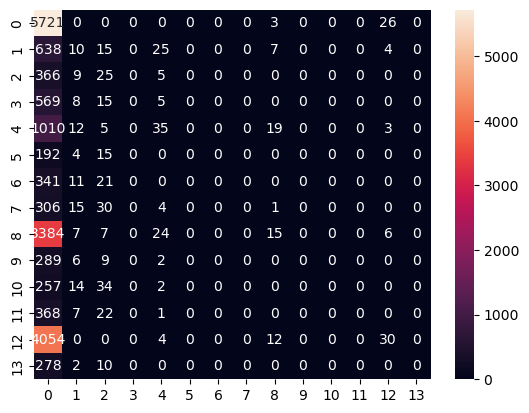

In [770]:
sns.heatmap(cm, annot=True, fmt='g');

## Podemos melhorar (tunar) esse modelo?

In [784]:
from sklearn.model_selection import GridSearchCV

In [772]:
parametros = {'n_estimators':[20, 50, 100, 150, 200],
              'max_depth':[5, 10, 15, 20, 30],
              'random_state': [SEED]}

In [796]:
gs = GridSearchCV(estimator=rfc, 
                  param_grid=parametros, 
                  scoring='accuracy',
                  cv=10, 
                  verbose=3)

Não há um resultado melhor com f1_weighted e grid search.

In [797]:
gs.fit(X_treino, y_treino)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END max_depth=5, n_estimators=20, random_state=42;, score=0.322 total time=   0.2s
[CV 2/10] END max_depth=5, n_estimators=20, random_state=42;, score=0.322 total time=   0.2s
[CV 3/10] END max_depth=5, n_estimators=20, random_state=42;, score=0.323 total time=   0.2s
[CV 4/10] END max_depth=5, n_estimators=20, random_state=42;, score=0.320 total time=   0.2s
[CV 5/10] END max_depth=5, n_estimators=20, random_state=42;, score=0.324 total time=   0.2s
[CV 6/10] END max_depth=5, n_estimators=20, random_state=42;, score=0.324 total time=   0.2s
[CV 7/10] END max_depth=5, n_estimators=20, random_state=42;, score=0.321 total time=   0.2s
[CV 8/10] END max_depth=5, n_estimators=20, random_state=42;, score=0.323 total time=   0.2s
[CV 9/10] END max_depth=5, n_estimators=20, random_state=42;, score=0.323 total time=   0.2s
[CV 10/10] END max_depth=5, n_estimators=20, random_state=42;, score=0.323 total time=   0.2s
[CV 1/

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=200,
                                              random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, 30],
                         'n_estimators': [20, 50, 100, 150, 200],
                         'random_state': [42]},
             scoring='accuracy', verbose=3)

In [798]:
gs.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

In [799]:
melhor_modelo = gs.best_estimator_

In [800]:
melhor_modelo.score(X_teste, y_teste)

0.3185763415033572

In [801]:
melhor_modelo.predict(X_teste)

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [802]:
y_pred_melhor = melhor_modelo.predict(X_teste)

In [803]:
print(classification_report(y_teste, y_pred_melhor, zero_division=0))

              precision    recall  f1-score   support

           0       0.32      0.99      0.49      5750
           1       0.10      0.01      0.02       699
           2       0.12      0.06      0.08       405
           3       0.00      0.00      0.00       597
           4       0.33      0.03      0.06      1084
           5       0.00      0.00      0.00       211
           6       0.00      0.00      0.00       373
           7       0.00      0.00      0.00       356
           8       0.26      0.00      0.01      3443
           9       0.00      0.00      0.00       306
          10       0.00      0.00      0.00       307
          11       0.00      0.00      0.00       398
          12       0.43      0.01      0.01      4100
          13       0.00      0.00      0.00       290

    accuracy                           0.32     18319
   macro avg       0.11      0.08      0.05     18319
weighted avg       0.27      0.32      0.16     18319



In [804]:
cm_melhor = confusion_matrix(y_teste, y_pred_melhor)

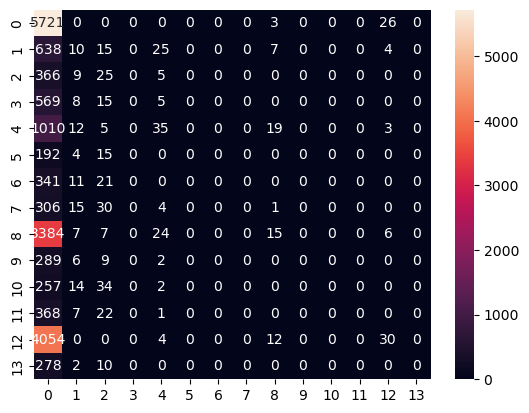

In [805]:
sns.heatmap(cm_melhor, annot=True, fmt='g');

## Salvando o modelo em um arquivo

In [791]:
import pickle

In [792]:
pickle.dump(melhor_modelo, open('../modelos/modelo.pkl', 'wb'))

In [793]:
modelo = pickle.load(open('../modelos/modelo.pkl', 'rb'))

In [794]:
modelo.score(X_teste, y_teste)

0.3185763415033572

## O que mais?

- testar o modelo com menos classes, reduzindo para 5
- se possível, alterar o y, analisar mais os dados e perceber se tem alguma outra predicao que faca sentido
- usar estratégias de balanceamento de dados como oversampling, undersampling, estratificacao de amostras
- usar estratégias de seleção de features como variance threshold, selecao por percentis, eliminacao recursiva de features
- adicionar outras features de datasets complementares 
- mudar a engenharia de features, entender quais features novas podem ser criadas e adiciona-las ao modelos..por exemplo estatisticas que não vazem dados